In [ ]:
# Libraries for data loading, data manipulation and data visulisation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns

# Libraries for data preparation 
#from statsmodels.formula.api import ols
from scipy.stats import pearsonr
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder, StandardScaler, MinMaxScaler

#Libraries for model building
#!pip install xgboost
#!pip install catboost
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso, ElasticNet, SGDRegressor, BayesianRidge, LinearRegression
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import HistGradientBoostingRegressor
# from lightgbm import LGBMRegressor

In [ ]:
df = pd.read_csv(r'C:\Users\USER\Downloads\house-prices-advanced-regression-techniques\train.csv')

In [ ]:
print(df.isna().sum())

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
 df.select_dtypes(include='float64').columns.tolist()

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [ ]:
 df.select_dtypes(include='int64').columns.tolist()

['Id',
 'MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [ ]:
Y=df['SalePrice']
X=df.drop(columns=['SalePrice'])

In [ ]:
encoder = OrdinalEncoder()
X_encoded = X.copy()
X_encoded[X.select_dtypes(include=['object']).columns] = encoder.fit_transform(
    X[X.select_dtypes(include=['object']).columns]
)

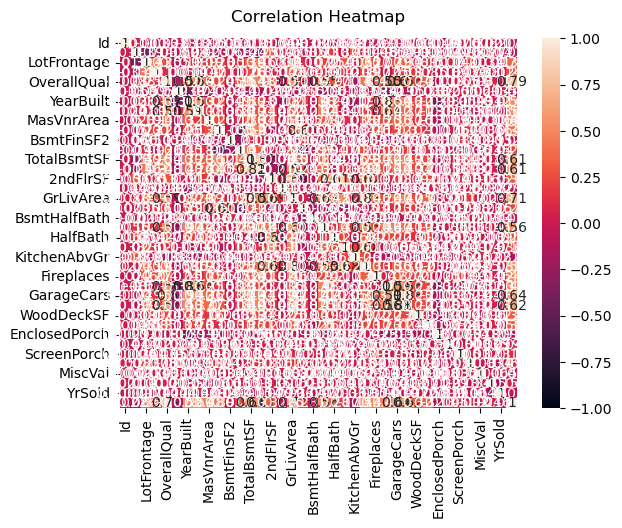

In [ ]:
heatmap = sns.heatmap(df.corr(numeric_only = True), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [ ]:
Model = HistGradientBoostingRegressor()
Model.fit(X_encoded, Y)

C:\Users\USER\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\USER\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 199, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\USER\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\USER\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\USER\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(

HistGradientBoostingRegressor()

In [ ]:
#Define a function to check the performace of different models 
def train_val_models(model,X, Y):
    
  #Create a 70 - 20 split of your data for the train and validation/test dataset
    X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

    train_scores = [] #A list to store all the training evaluation scores
    val_scores = [] #A list to store all the validation evaluation scores

    
    model.fit( X_train, Y_train)
    Y_train_pred = model.predict(X_train)
    Y_val_pred = model.predict(X_val)
    train_score = r2_score(Y_train, Y_train_pred)
    val_score = r2_score(Y_val, Y_val_pred)
    train_scores.append(train_score)
    val_scores.append(val_score)
    
    score_df = pd.DataFrame([train_scores, val_scores], index=['Train', 'Valid']).T

    return score_df

In [ ]:
score_df = train_val_models(Model, X_encoded,Y)

In [ ]:
score_df

,Train,Valid
0,0.980923,0.888938


In [ ]:
test_data = pd.read_csv(r'C:\Users\USER\Downloads\house-prices-advanced-regression-techniques\test.csv')
X_test_encoded = test_data.copy()
X_test_encoded[test_data.select_dtypes(include=['object']).columns] = encoder.fit_transform(
    test_data[test_data.select_dtypes(include=['object']).columns]
)

In [ ]:
predictions = Model.predict(X_test_encoded)

In [ ]:
X_test_encoded['Predicted_SalePrice'] = predictions

# View results
print(X_test_encoded.head())

     Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0  1461          20       2.0         80.0    11622     1.0    NaN       3.0   
1  1462          20       3.0         81.0    14267     1.0    NaN       0.0   
2  1463          60       3.0         74.0    13830     1.0    NaN       0.0   
3  1464          60       3.0         78.0     9978     1.0    NaN       0.0   
4  1465         120       3.0         43.0     5005     1.0    NaN       0.0   

   LandContour  Utilities  ...  PoolArea  PoolQC  Fence  MiscFeature  MiscVal  \
0          3.0        0.0  ...         0     NaN    2.0          NaN        0   
1          3.0        0.0  ...         0     NaN    NaN          0.0    12500   
2          3.0        0.0  ...         0     NaN    2.0          NaN        0   
3          3.0        0.0  ...         0     NaN    NaN          NaN        0   
4          1.0        0.0  ...         0     NaN    NaN          NaN        0   

   MoSold  YrSold  SaleType  Sal